# How well do skills and jobs pay for Data Analysts?

### Methology
1. Evaluate median salary for 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanding skills

In [36]:
import pandas as pd
import seaborn as sns
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [37]:
job_country = 'United States'

df_Jobs = df[df['job_country'] == job_country].dropna(subset=['salary_year_avg']).copy()

In [38]:
job_titles = df_Jobs['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [39]:
df_top6 = df_Jobs[df_Jobs['job_title_short'].isin(job_titles)]

In [40]:
job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

<function matplotlib.pyplot.show(close=None, block=None)>

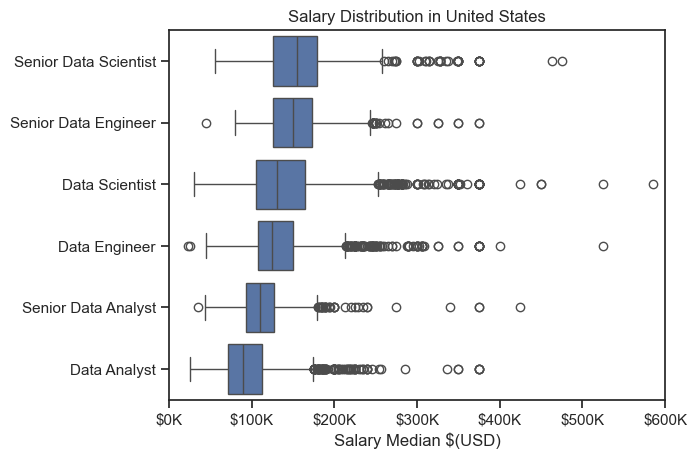

In [41]:
sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order = job_order)
sns.set_theme(style='ticks')

plt.title(f'Salary Distribution in {job_country}')
plt.xlabel('Salary Median $(USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show


## Investigate Median Salary Vs Skill for Data Analyst

In [45]:
job_title = 'Data Analyst'
job_country = 'United States'

df_jobs = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_country)].copy()
df_jobs.dropna(subset=['salary_year_avg'], inplace = True)

In [46]:
df_jobs = df_jobs.explode('job_skills')

df_jobs[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [49]:
df_top_pay = df_jobs.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('median', ascending = False)

df_top_pay = df_top_pay.head(10)

In [50]:
df_top_skills = df_jobs.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending = False)

df_top_skills = df_top_skills.head(10).sort_values('median', ascending = False)

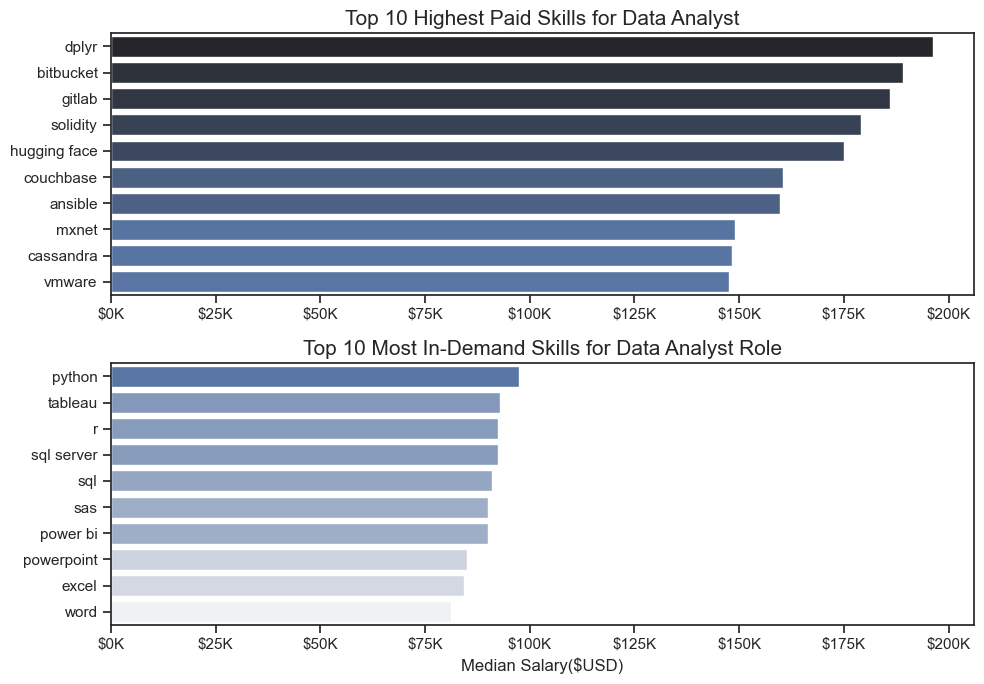

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))


sns.set_theme(style='ticks')

sns.barplot(data= df_top_pay, x = 'median', y = df_top_pay.index, ax = ax[0], hue='median', legend = False, palette='dark:b_r')
# skill_sal[::-1].plot(kind='barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title(f'Top 10 Highest Paid Skills for {job_title}', fontsize= 15)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


sns.barplot(data= df_top_skills, x = 'median', y = df_top_skills.index, ax = ax[1], hue='median', legend = False, palette='light:b')
# skill_count[::-1].plot(kind='barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title(f'Top 10 Most In-Demand Skills for {job_title} Role', fontsize= 15)
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.tight_layout()